<a href="https://colab.research.google.com/github/AdityaDhiman05/UPI-Fraud-Detection-Project/blob/main/DAY_5_CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today, we will calculate and visualize Month-over-Month (MoM) and Year-over-Year (YoY) growth for UPI transactions. This will help us see how transaction volume and value change over time, and also identify unusual spikes or dips that might indicate anomalies or fraud patterns.

In [13]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Load the correct dataset
df = pd.read_csv("upi_cleaned.csv")
df.head()



Saving upi_cleaned.csv to upi_cleaned (5).csv


,Month,Banks_Live,Volume_Mn,Value_Cr,Avg_Txn_Value_INR,MoM_Growth_Volume_%,MoM_Growth_Value_%,Year,Month_Num,Quarter
0,2016-04-01,21,0.00,0.00,NaN,NaN,NaN,2016,4,2
1,2016-05-01,21,0.00,0.00,NaN,NaN,NaN,2016,5,2
2,2016-06-01,21,0.00,0.00,NaN,NaN,NaN,2016,6,2
3,2016-07-01,21,0.09,0.38,42.222222,inf,inf,2016,7,3
4,2016-08-01,21,0.09,3.09,343.333333,0.0,713.157895,2016,8,3


In [15]:
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')
df['Month'].head(10)

,Month
0,2016-04-01
1,2016-05-01
2,2016-06-01
3,2016-07-01
4,2016-08-01
5,2016-09-01
6,2016-10-01
7,2016-11-01
8,2016-12-01
9,2017-01-01


Before calculating growth rate over MoM or YoY we will first sort data of date in ascending order

In [16]:
df = df.sort_values('Month').reset_index(drop=True)

We calculate Month-over-Month (MoM) growth for both Volume and Value.

Formula:
MoM Growth = (Current - Previous) / Previous * 100


In [18]:
df["MoM_Value_Growth"]=df["Value_Cr"].pct_change()*100
df["MoM_Volume_Growth"]=df["Volume_Mn"].pct_change()*100
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

df.head()

,Month,Banks_Live,Volume_Mn,Value_Cr,Avg_Txn_Value_INR,MoM_Growth_Volume_%,MoM_Growth_Value_%,Year,Month_Num,Quarter,MoM_Value_Growth,MoM_Volume_Growth
0,2016-04-01,21,0.00,0.00,0.000000,0.0,0.000000,2016,4,2,0.000000,0.0
1,2016-05-01,21,0.00,0.00,0.000000,0.0,0.000000,2016,5,2,0.000000,0.0
2,2016-06-01,21,0.00,0.00,0.000000,0.0,0.000000,2016,6,2,0.000000,0.0
3,2016-07-01,21,0.09,0.38,42.222222,0.0,0.000000,2016,7,3,0.000000,0.0
4,2016-08-01,21,0.09,3.09,343.333333,0.0,713.157895,2016,8,3,713.157895,0.0


We also calculate Year-over-Year (YoY) growth. This compares each month to the same month in the previous year.


In [19]:
df['YoY_Volume_Growth'] = df['Volume_Mn'].pct_change(12) * 100
df['YoY_Value_Growth'] = df['Value_Cr'].pct_change(12) * 100
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)
df.head()

,Month,Banks_Live,Volume_Mn,Value_Cr,Avg_Txn_Value_INR,MoM_Growth_Volume_%,MoM_Growth_Value_%,Year,Month_Num,Quarter,MoM_Value_Growth,MoM_Volume_Growth,YoY_Volume_Growth,YoY_Value_Growth
0,2016-04-01,21,0.00,0.00,0.000000,0.0,0.000000,2016,4,2,0.000000,0.0,0.0,0.0
1,2016-05-01,21,0.00,0.00,0.000000,0.0,0.000000,2016,5,2,0.000000,0.0,0.0,0.0
2,2016-06-01,21,0.00,0.00,0.000000,0.0,0.000000,2016,6,2,0.000000,0.0,0.0,0.0
3,2016-07-01,21,0.09,0.38,42.222222,0.0,0.000000,2016,7,3,0.000000,0.0,0.0,0.0
4,2016-08-01,21,0.09,3.09,343.333333,0.0,713.157895,2016,8,3,713.157895,0.0,0.0,0.0


Now we plot Month-over-Month growth rates for Volume and Value.


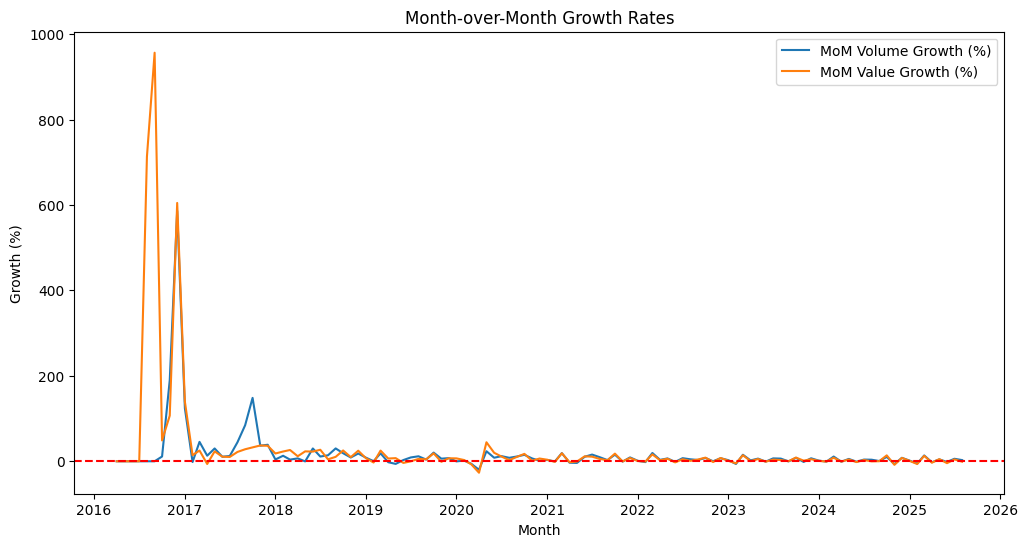

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df['Month'], df['MoM_Volume_Growth'], label='MoM Volume Growth (%)')
plt.plot(df['Month'], df['MoM_Value_Growth'], label='MoM Value Growth (%)')
plt.axhline(0, color='red', linestyle='--')
plt.title("Month-over-Month Growth Rates")
plt.xlabel("Month")
plt.ylabel("Growth (%)")
plt.legend()
plt.show()


Now we plot Year-over-Year growth rates for Volume and Value.


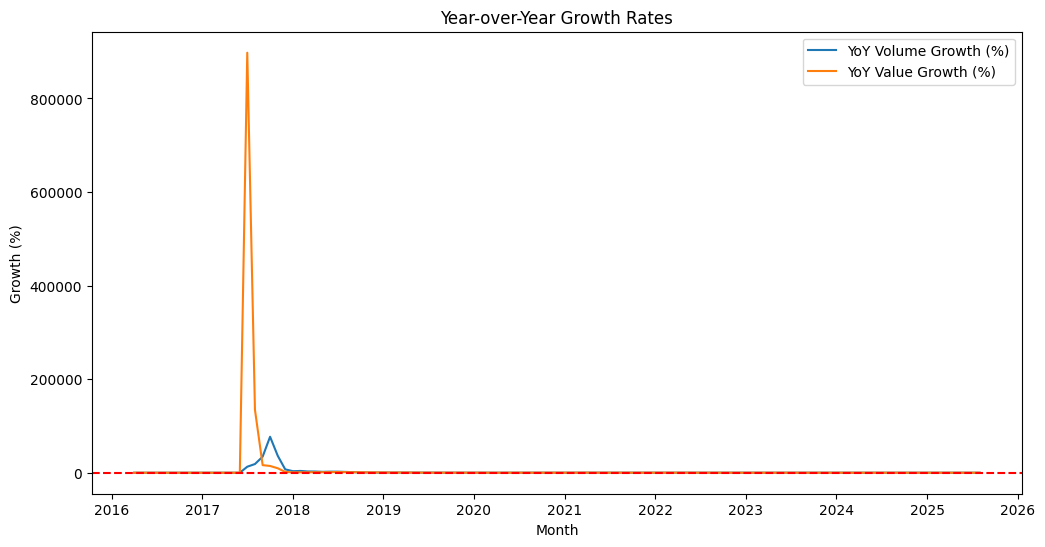

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df['Month'], df['YoY_Volume_Growth'], label='YoY Volume Growth (%)')
plt.plot(df['Month'], df['YoY_Value_Growth'], label='YoY Value Growth (%)')
plt.axhline(0, color='red', linestyle='--')
plt.title("Year-over-Year Growth Rates")
plt.xlabel("Month")
plt.ylabel("Growth (%)")
plt.legend()
plt.show()
